# Assignment 03 - K-Means Clustering - Vishal Puri

### Import necessary Libraries

In [1]:
from datascience import * 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plots
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

### Import data as dataframe. 
Most of the implementations are performed better as a dataframe. Some visualizations are easier when the data is used in a Table form. Therefore, the dataframe will be converted to Tables IF required. 

ID does not play a role on the disease and therefore will be dropped from the dataframe. 

In [2]:
testing = pd.read_csv("ALS_TestingData_78.csv")
training = pd.read_csv("ALS_TrainingData_2223.csv")
testing_df = testing.drop(columns = ['ID'])
training_df = training.drop(columns = ['ID'])
training_df

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


### Normalize the Dataframe 

Notice that the each columns contains large range of numbers. Some columns have only large positive numbers. Some Columns have positive and negative values. Therefore, the normalization of the data is required. A function as below can be created to normalize each column of the dataframe with minimum effort. 

In [3]:
def normalize(df):
    result = df.copy()
    for features in df.columns:
        max_value = df[features].max()
        min_value = df[features].min()
        result[features] = (df[features] - min_value) / (max_value - min_value)
    return result

Normalize each dataframes. 

In [4]:
testing_df = normalize(testing_df)
training_df = normalize(training_df)

The ALSFRS_slope component is to be predicted using few phenotypes and therefore will be held as constant Y-axis. SO, for X-axis drop 'ALSFRS_slope'

In [5]:
x_columns_training = training_df.drop(columns = ['ALSFRS_slope']).columns
x_columns_testing = testing_df.drop(columns = ['ALSFRS_slope']).columns

### Data Visulization before K-Means Clustering

Set X values and Y values. Since we are asked to use 'ALSFRS_slope' as one the variables, that particular column will be set as y-axis. We will use both the training data fist. 

In [6]:
len(x_columns_training)

99

PLot 'ALSFRS_slope' vs rest of the columns from training data. the length of the x_varaibles are 99 therefore, we need 99 plots. ALSFRS_slope vs each column to see how the clustering is formed and get intuition from there. 

The following FOR loop extracts 5 columns at a time and make an array so that 5 columns are selected for each row on the sns.pairplot below. If we skip this portion, sns.pariplot will only plot in one horizontal plot making it impossible to see the plots. Therefore, we want to create 5 plots at a time. 

In [7]:
each_row_on_plot_training= []
first_value = range(0,100,5)
second_value = range(5,100,5)
for m, n in zip(first_value, second_value):
        inter = (x_columns_training[slice(m,n)])
        each_row_on_plot_training.append(inter)

There are 99 columns so, the following lines of code implements 19*5 = 95 columns.So, another line of code is required for rest of the 4th columns 96 to 99th columns. 

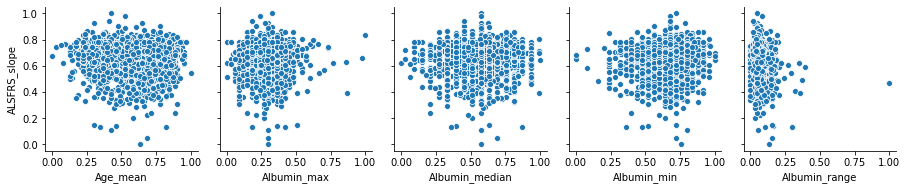

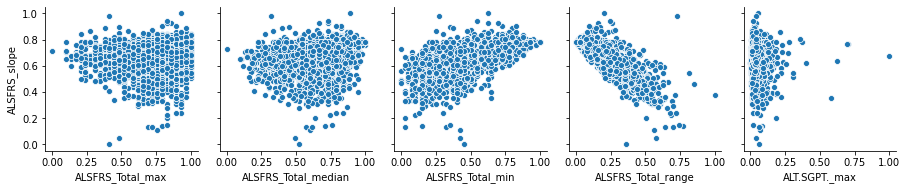

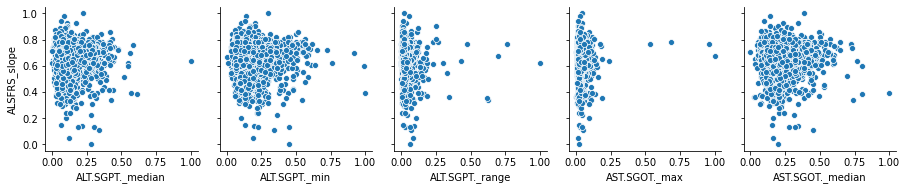

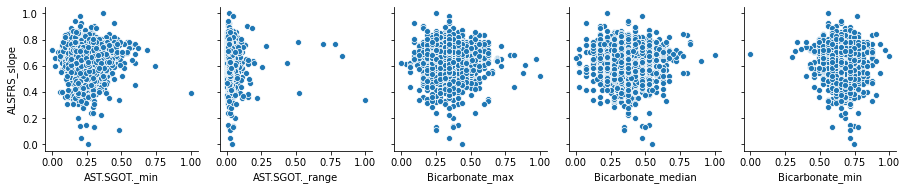

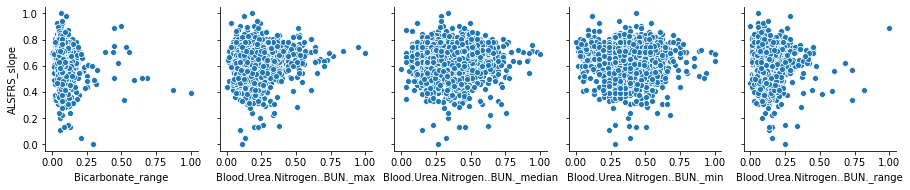

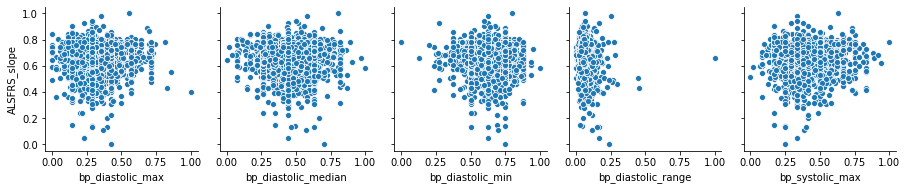

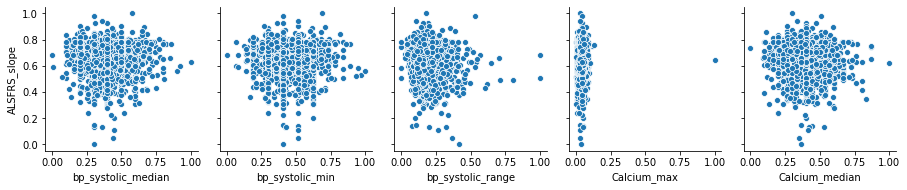

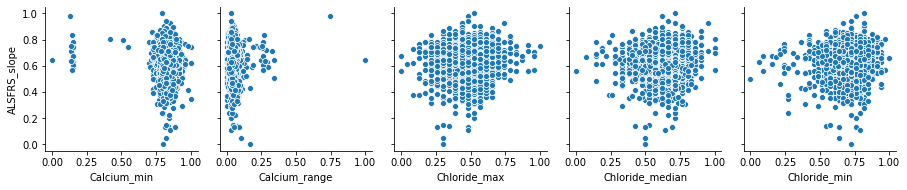

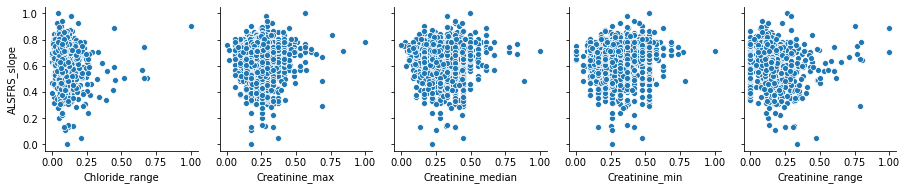

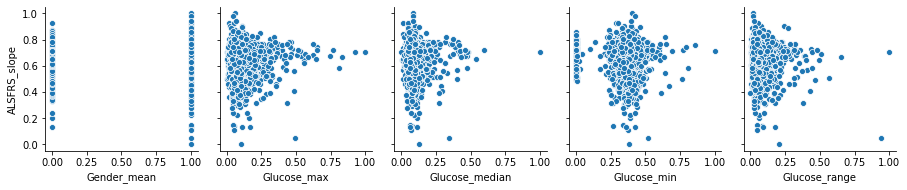

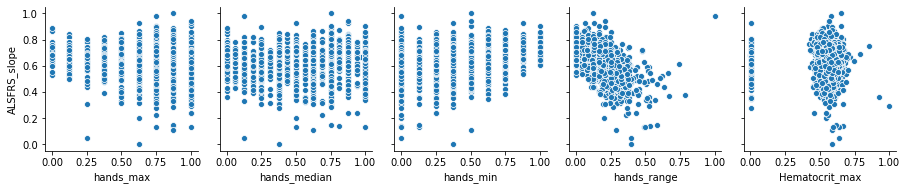

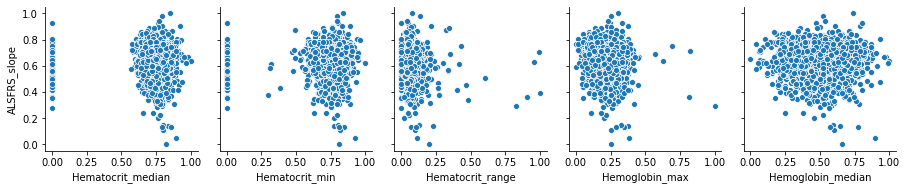

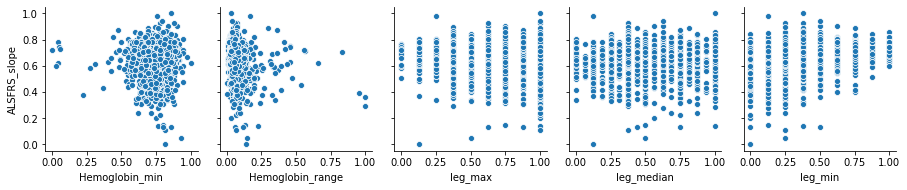

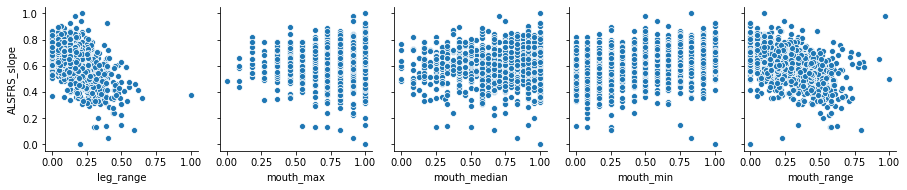

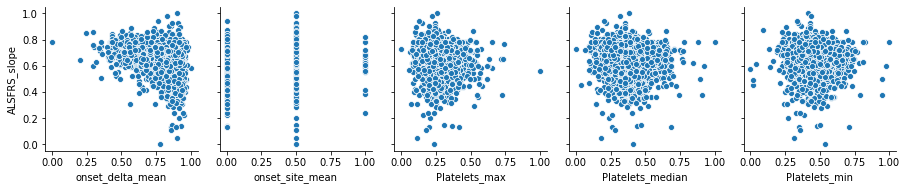

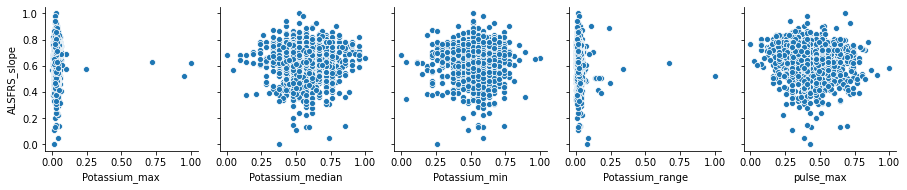

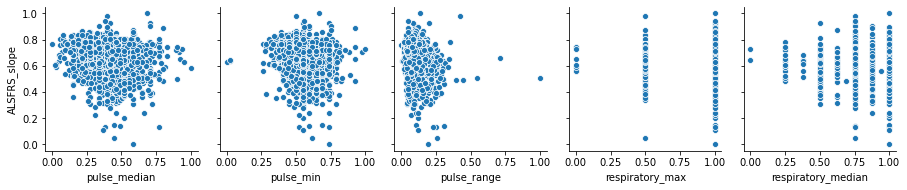

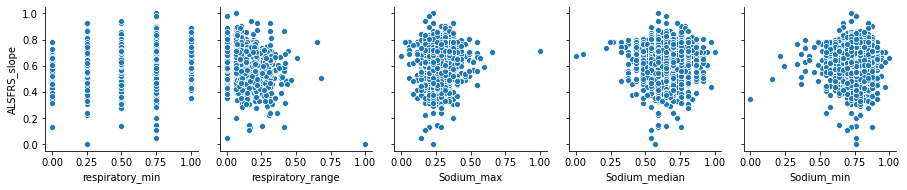

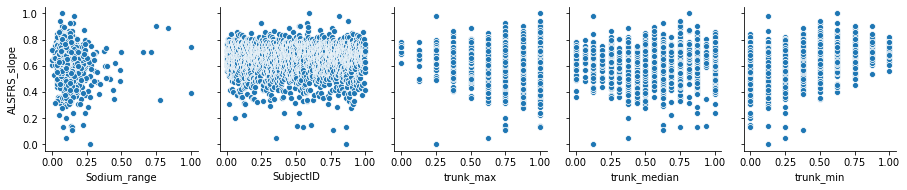

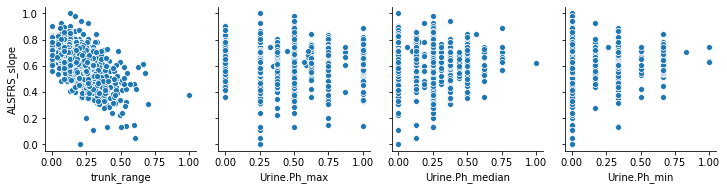

In [8]:
last_four = x_columns_training[slice(95,99)]
for i in range(0,19):
    sns.pairplot(data = training_df, y_vars = ['ALSFRS_slope'], x_vars = each_row_on_plot_training[i], kind ='scatter')
sns.pairplot(data = training_df, y_vars = ['ALSFRS_slope'], x_vars = last_four, kind ='scatter');

### Choosing variables that show some corelation with ALSFRS_slope for K-Means CLustering. 

Choosing variables from the above plots based on observation - see corelatiuon between X and Y axis. PCA (Principal Component Analysis) was performed and is not included in the code beacuse the first principal component was only accountable for about 25% of the data. Therefore, it was necessary to visually inspect and find corelation. 

Based on the above plot we choose following variables that seem to have some form of corelation with ALSFRS_slope excluding some form for ALSFRS variable such as ALSFRS_Total_min and so on. 
1. AST.SGOT._min
2. Creatinine__range
3. hands_range
4. leg_range
5. mouth_range
6. onset_delta_mean
7. trunk_range

From inference, the 99 columns can be reduced to 10 columns that seems to have corelation with the ALSFRS_slope. 

### <br>K-Means Clustering for 7 variables from training dataset. 

### 1. AST.SGOT_min
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable. THe optimum number of clusters is the value on the elbow of the plot. <br> <br>

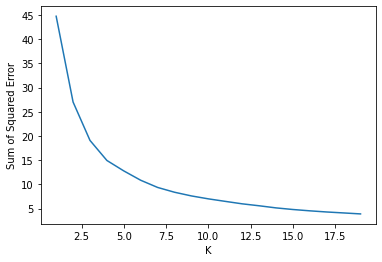

In [9]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','AST.SGOT._min']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### <br>Optimum number of clusters - n_clusters = 6

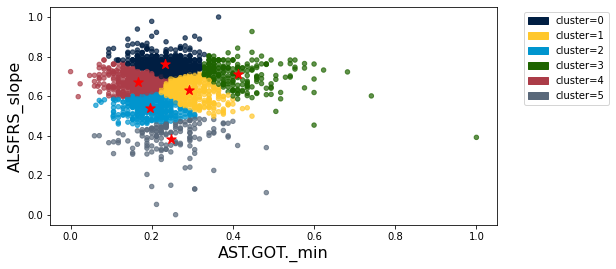

In [10]:
# create dataset for ALSFR_slope and AST.GOT._min
dataset = {'AST.GOT._min' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['AST.GOT._min','ALSFRS_slope']])

# Add cluster as column on dataframe that will be used to plot
df['cluster'] = y_predicted

# converting to table will allow using only one line of code to plot 
table_for_plot = Table.from_df(df) # convert to table
table_for_plot.scatter('AST.GOT._min', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

# plot centroids for each cluster to see how distance vary
centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);


#### Using number of cluster = 4 to compare with optimum number of clusters. 

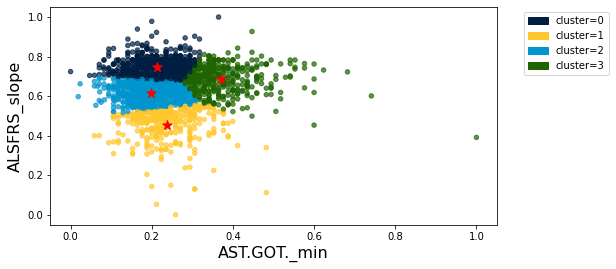

In [11]:
# create dataset for ALSFR_slope and AST.GOT._min
dataset = {'AST.GOT._min' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 4)
y_predicted = kmeans.fit_predict(df[['AST.GOT._min','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('AST.GOT._min', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

It is seen that using less than the optimum number of colors, the data is misrepresented and the clusters that are not-intuitive are left out. 

### 2. Ceratinine_range
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

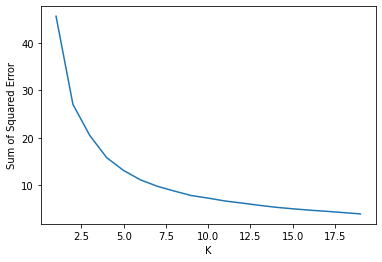

In [12]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','Creatinine_range']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 6

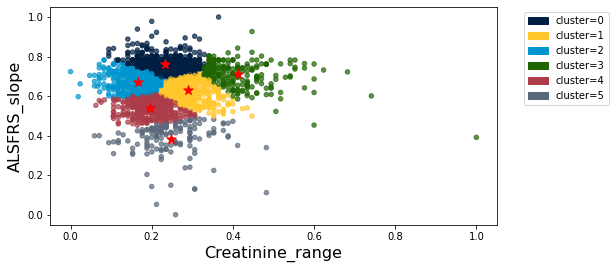

In [13]:
# create dataset for ALSFR_slope and Creatinine_range
dataset = {'Creatinine_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['Creatinine_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('Creatinine_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 4

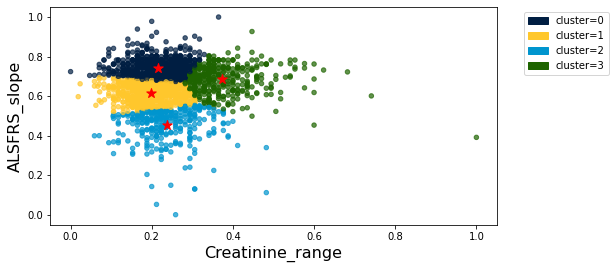

In [14]:
# create dataset for ALSFR_slope and Creatinine_range
dataset = {'Creatinine_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 4)
y_predicted = kmeans.fit_predict(df[['Creatinine_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('Creatinine_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

### 3. hands_range
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

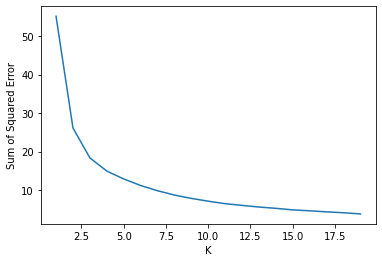

In [15]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','hands_range']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 5

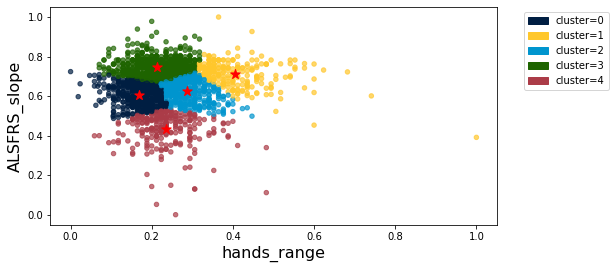

In [16]:
# create dataset for ALSFR_slope and hands_range
dataset = {'hands_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 5)
y_predicted = kmeans.fit_predict(df[['hands_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('hands_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 4

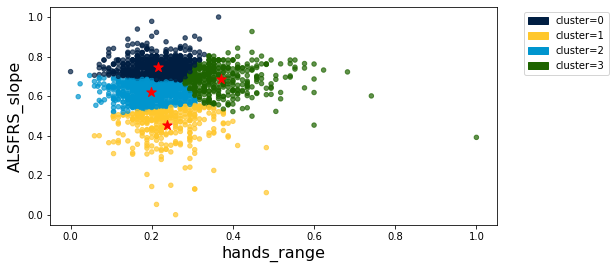

In [17]:
# create dataset for ALSFR_slope and hands_range
dataset = {'hands_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 4)
y_predicted = kmeans.fit_predict(df[['hands_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('hands_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

### 4. leg_range
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

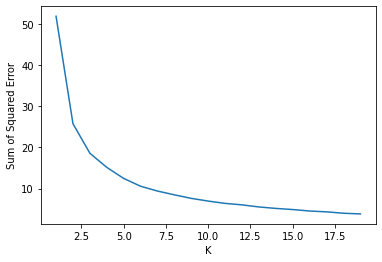

In [18]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','leg_range']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 6

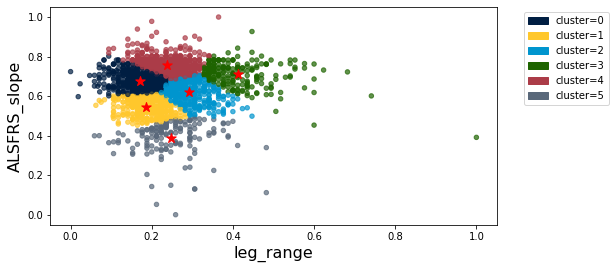

In [19]:
# create dataset for ALSFR_slope and leg_range
dataset = {'leg_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['leg_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('leg_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 5

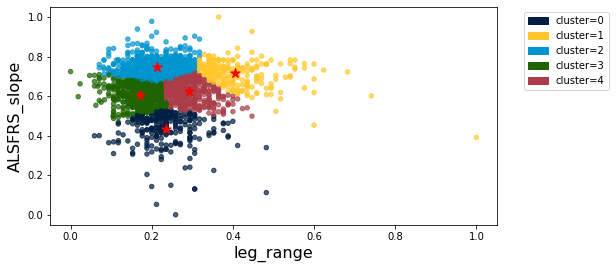

In [20]:
# create dataset for ALSFR_slope and leg_range
dataset = {'leg_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 5)
y_predicted = kmeans.fit_predict(df[['leg_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('leg_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

When one less cluster is use, we see that the various dataset are compromised and set into clusters that it does not belong to. 

### 5. mouth_range
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

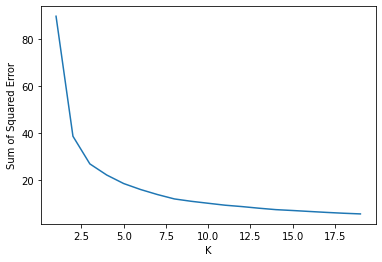

In [21]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','mouth_range']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 8

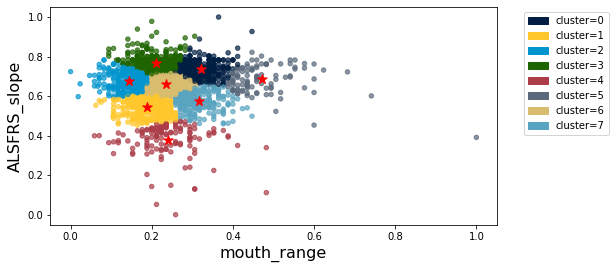

In [22]:
# create dataset for ALSFR_slope and mouth_range
dataset = {'mouth_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 8)
y_predicted = kmeans.fit_predict(df[['mouth_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('mouth_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 6

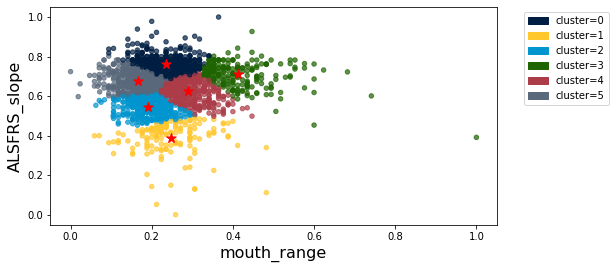

In [23]:
# create dataset for ALSFR_slope and mouth_range
dataset = {'mouth_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['mouth_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('mouth_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

Again, it is seen that the some of the clusters are combined together. Therefore, the prediction is going to be less accurate. 

### 6. onset_delta_mean
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

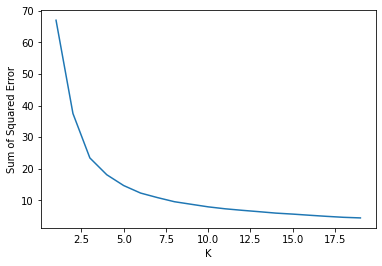

In [24]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','onset_delta_mean']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 8

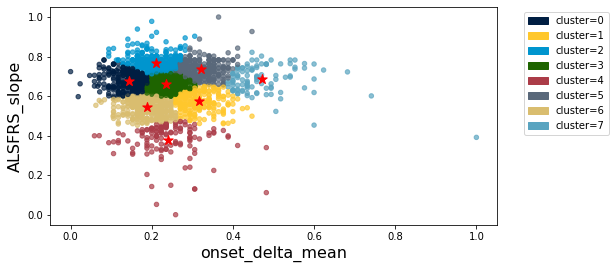

In [25]:
# create dataset for ALSFR_slope and onset_delta_mean
dataset = {'onset_delta_mean' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 8)
y_predicted = kmeans.fit_predict(df[['onset_delta_mean','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('onset_delta_mean', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 6

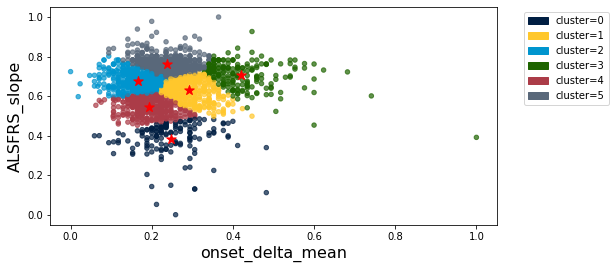

In [26]:
# create dataset for ALSFR_slope and onset_delta_mean
dataset = {'onset_delta_mean' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['onset_delta_mean','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('onset_delta_mean', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

### 7. trunk_range
Using Elbow method that utilizes least Sum of Squared Errors find the optimum number of clusters for the variable

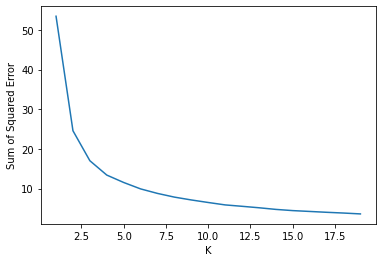

In [27]:
k_range = range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','trunk_range']])
    SSE.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE);

##### Optimum number of clusters - n_clusters = 6

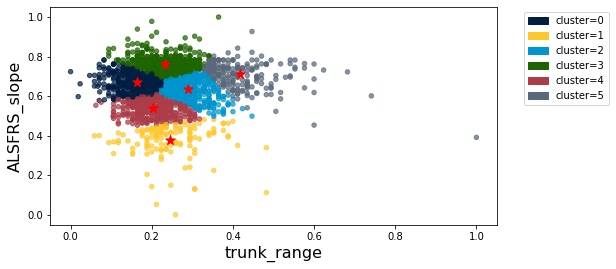

In [28]:
# create dataset for ALSFR_slope and trunk_range
dataset = {'trunk_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 6)
y_predicted = kmeans.fit_predict(df[['trunk_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('trunk_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

#### Using number of cluster = 5

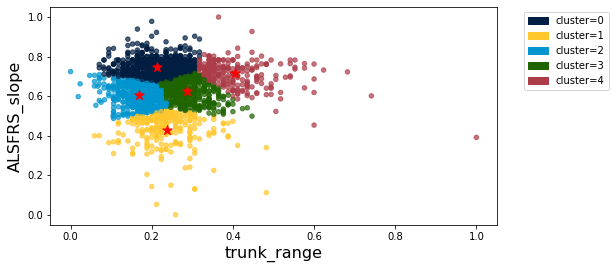

In [29]:
# create dataset for ALSFR_slope and trunk_range
dataset = {'trunk_range' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 5)
y_predicted = kmeans.fit_predict(df[['trunk_range','ALSFRS_slope']])

df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('trunk_range', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);

centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);

## Training Data vs Testing Data Clustering Comparison for variable "onset_delta_mean"

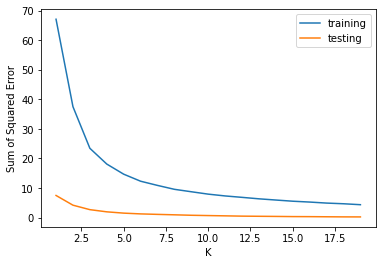

In [30]:
# FOR Training Dataset
k_range = range(1,20)
SSE_train = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(training_df[['ALSFRS_slope','onset_delta_mean']])
    SSE_train.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE_train, label = 'training');


# FOR Testing Dataset
k_range = range(1,20)
SSE_test = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(testing_df[['ALSFRS_slope','onset_delta_mean']])
    SSE_test.append(km.inertia_)
plots.xlabel('K')
plots.ylabel('Sum of Squared Error')
plots.plot(k_range,SSE_test, label = 'testing');
plots.legend();

**It is seen that the testing dataset starts and ends with less amout of SSE error and the elbow value equivalent to number of clusters for training = 8 while that for the testing data = 3.** 

### Training dataset with n_clusters = 8 and testing data set with n = 3 clusters

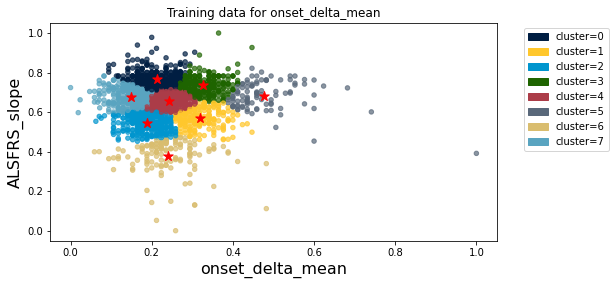

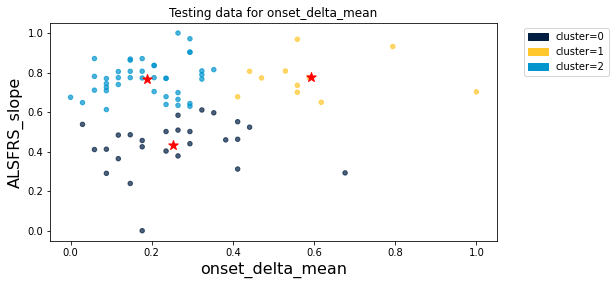

In [31]:
# create dataset for ALSFR_slope and onset_delta_mean
dataset = {'onset_delta_mean' : training_df['AST.SGOT._min'], 'ALSFRS_slope' : training_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 8)
y_predicted = kmeans.fit_predict(df[['onset_delta_mean','ALSFRS_slope']])
df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('onset_delta_mean', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);
centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);
plots.title("Training data for onset_delta_mean");


# create dataset for ALSFR_slope and onset_delta_mean
dataset = {'onset_delta_mean' : testing_df['AST.SGOT._min'], 'ALSFRS_slope' : testing_df['ALSFRS_slope']}
df = pd.DataFrame(data = dataset)

# Based on number of clusters use kmeans.fit_predict
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(df[['onset_delta_mean','ALSFRS_slope']])
df['cluster'] = y_predicted
table_for_plot = Table.from_df(df)
table_for_plot.scatter('onset_delta_mean', select = 'ALSFRS_slope', group ='cluster', labels = None, height = 4, width =8);
centroids = kmeans.cluster_centers_
plots.scatter(centroids[:,0],centroids[:,1], color = 'red', marker = '*', s = 10**2);
plots.title('Testing data for onset_delta_mean');